interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586), Output()), _dom_clas…

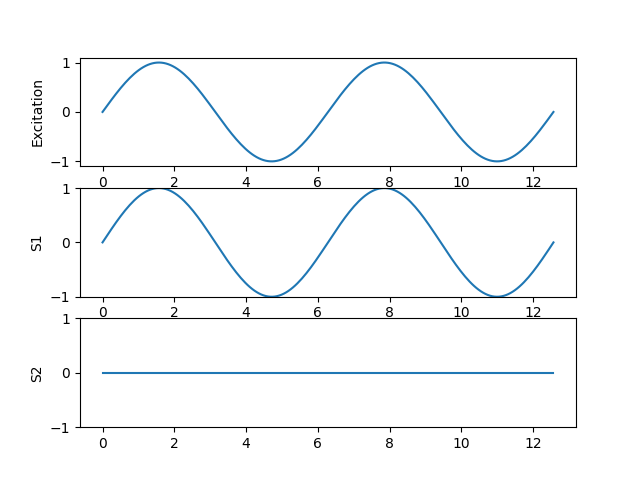

In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4 * np.pi,200)
fig = plt.figure()
ax = fig.subplots(3,1)
theta=0
line1, = ax[0].plot(x, np.sin(x))
line2, = ax[1].plot(x, np.cos(theta)*np.sin(x))
line3, = ax[2].plot(x, np.sin(theta)*np.sin(x))
ax[1].set_ylim(-1,1)
ax[2].set_ylim(-1,1)
ax[0].set_ylabel("Excitation")
ax[1].set_ylabel("S1")
ax[2].set_ylabel("S2")

def update(theta = 0):
    line2.set_ydata(np.cos(theta)*np.sin(x))
    line3.set_ydata(np.sin(theta)*np.sin(x))
    fig.canvas.draw_idle()

interact(update, theta=FloatSlider(min=0, max=2*np.pi));

Text(0, 0.5, 'S2')

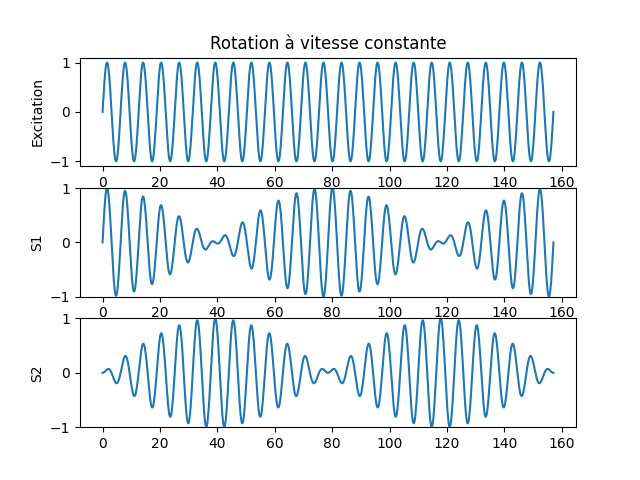

In [6]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 50 * np.pi,1000)
theta=x/25
fig = plt.figure()

ax = fig.subplots(3,1)
line1, = ax[0].plot(x, np.sin(x))
line2, = ax[1].plot(x, np.cos(theta)*np.sin(x))
line3, = ax[2].plot(x, np.sin(theta)*np.sin(x))
ax[1].set_ylim(-1,1)
ax[2].set_ylim(-1,1)
ax[0].set_ylabel("Excitation")
ax[0].set_title("Rotation à vitesse constante")
ax[1].set_ylabel("S1")
ax[2].set_ylabel("S2")



In [3]:
plt.close()

## Soit un résolver à une certaine position

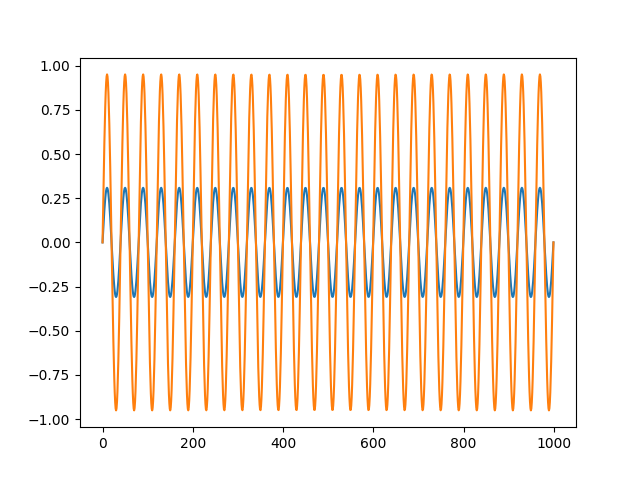

In [12]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 50 * np.pi,1000)
Se=np.sin(x)
theta_r=0.2*2*np.pi
S1=np.cos(theta_r)*Se
S2=np.sin(theta_r)*Se
plt.figure()
plt.plot(S1)
plt.plot(S2)
plt.show()

Si on compare avec la référence pour la plage d'angle, on peut trouver la bonne position

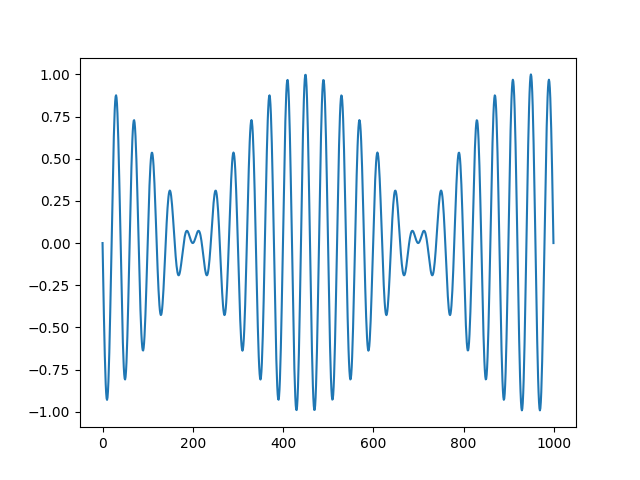

In [9]:

theta=np.linspace(0,2*np.pi,1000)
plt.figure()
plt.plot(S1*np.sin(theta)-S2*np.cos(theta))
plt.show()

In [27]:
import sympy as sp
omega,t,theta,phi=sp.symbols("omega,t,theta,phi")
E=sp.sin(omega*t)*(sp.cos(theta)*sp.sin(phi)-sp.sin(theta)*sp.cos(phi))
E

(sin(phi)*cos(theta) - sin(theta)*cos(phi))*sin(omega*t)

In [28]:
sp.trigsimp(E)

sin(omega*t)*sin(phi - theta)

In [29]:
sp.trigsimp(sp.sin(omega*t)*sp.sin(omega*t))

sin(omega*t)**2

On a une relation trigonometrique
$\sin(a)^2=\frac{1-\cos(2a)}{2}$

In [30]:
D=E*sp.sin(omega*t)
D

(sin(phi)*cos(theta) - sin(theta)*cos(phi))*sin(omega*t)**2

In [31]:
D2=sp.trigsimp(D)
D2

sin(omega*t)**2*sin(phi - theta)

En utilisant la relation trigonometrique ci-dessus, on peut déduire
$$
D2=\frac{1-\cos(2 \omega t)}{2}\cdot \sin(\phi-\theta)
$$

Si on filtre passe-bas, la composante $cos(2 \omega t)$ disparaît, il reste
$$
D2_{filtre}=\sin(\phi-\theta)
$$